In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/gurgaon_properties_cleaned_v2.csv")
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ireo victory valley,sector 67,2.95,12110.0,2436.0,Super Built up area 2436(226.31 sq.m.)Built Up...,3,3,3+,...,2436.0,2236.000000,2036.000000,0,1,0,1,0,0,165.0
1,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,...,NaN,1440.000000,NaN,0,1,0,0,0,2,70.0
2,house,emaar mgf marbella,sector 66,NaN,NaN,NaN,Plot area 350(292.64 sq.m.)Built Up area: 6500...,4,4,3+,...,NaN,6500.000000,NaN,1,1,1,1,0,1,136.0
3,house,sobha city,sector 108,10.50,14323.0,7331.0,Built Up area: 7331 (681.07 sq.m.),5,4,3+,...,NaN,7330.969373,NaN,0,0,0,0,0,1,59.0
4,flat,signature global grand iva,sector 103,0.30,8290.0,362.0,Carpet area: 361.88 (33.62 sq.m.),1,2,2,...,NaN,NaN,361.882318,0,0,0,0,0,1,37.0


In [5]:
df.shape

(3802, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3802 non-null   object 
 1   society              3801 non-null   object 
 2   sector               3802 non-null   object 
 3   price                3784 non-null   float64
 4   price_per_sqft       3784 non-null   float64
 5   area                 3784 non-null   float64
 6   areaWithType         3802 non-null   object 
 7   bedRoom              3802 non-null   int64  
 8   bathroom             3802 non-null   int64  
 9   balcony              3802 non-null   object 
 10  floorNum             3783 non-null   float64
 11  facing               2697 non-null   object 
 12  agePossession        3802 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1943 non-null   f

In [7]:
df.duplicated().sum()

116

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(3686, 23)

## Property Type

<Axes: xlabel='property_type'>

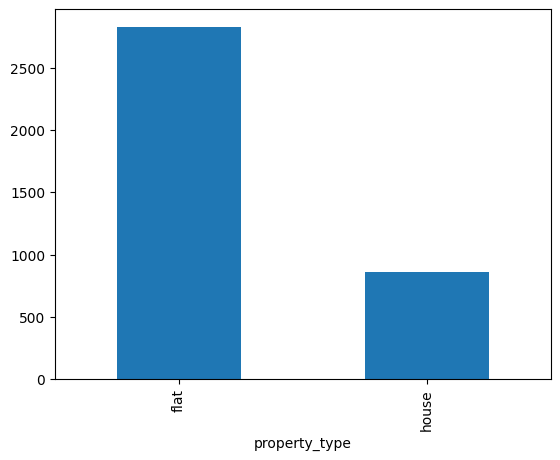

In [10]:
df['property_type'].value_counts().plot(kind='bar')

**Observations** -
**Flats are in majority (75%) and houses are less in number ~ (25%)**

## Society

In [11]:
df['society'].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
raheja the vedaanta floors                1
kothi                                     1
mariners home                             1
rajendra park gurgaon                     1
laxmi garden sector-11                    1
Name: count, Length: 676, dtype: int64

**Observations** -
**About 486 flats are independent means they do not belong to any society**

In [12]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)
# if we take the top 75 aparatments then 50% data is coming from them only

society
tulip violet                            0.023445
ss the leaf                             0.046264
dlf new town heights                    0.059394
shapoorji pallonji joyville gurugram    0.072523
signature global park                   0.083776
                                          ...   
puri emerald bay                        0.490153
the close north                         0.494217
unitech uniworld resorts                0.498281
ramsons kshitij                         0.502344
central park flower valley              0.506096
Name: proportion, Length: 75, dtype: float64

In [13]:
society_counts = df[df['society'] != 'independent']['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 0,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 275,
 'Very Low (1)': 306}

<ipython-input-14-a4adffc2369e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_societies.index, y=top_10_societies.values, palette="Blues_d")


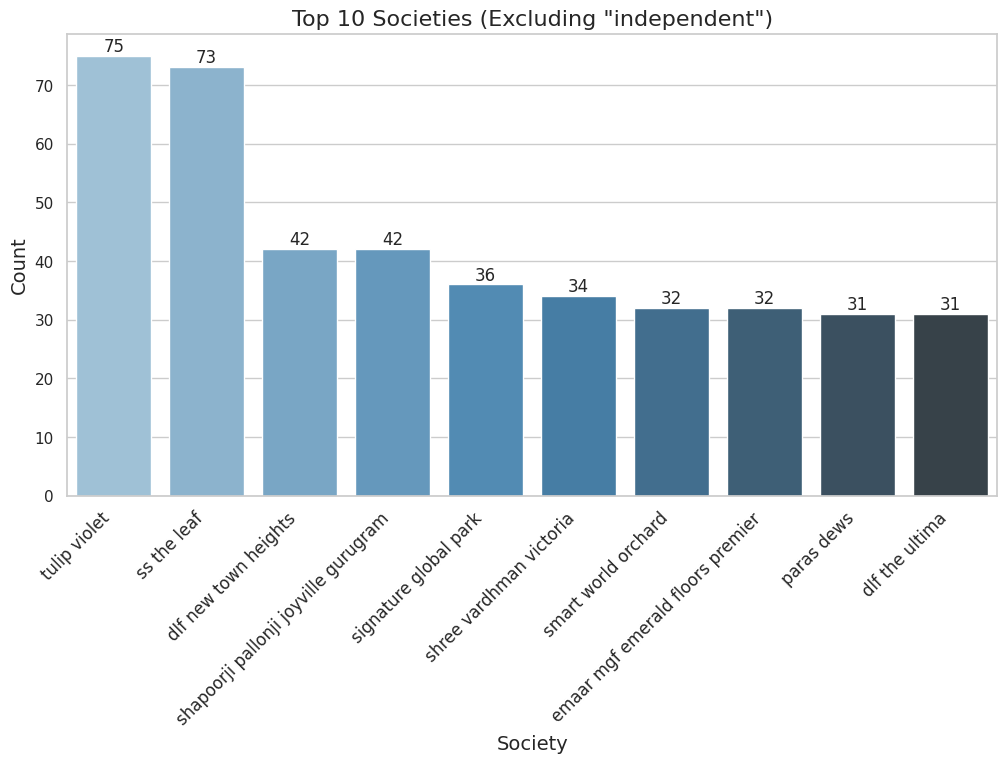

In [14]:
top_10_societies = df[df['society'] != 'independent']['society'].value_counts().head(10)

fig = plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Creating the bar plot
sns.barplot(x=top_10_societies.index, y=top_10_societies.values, palette="Blues_d")

# Adding titles and labels
plt.title('Top 10 Societies (Excluding "independent")', fontsize=16)
plt.xlabel('Society', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding count labels on top of the bars
for i, count in enumerate(top_10_societies.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()

In [15]:
df['society'].isnull().sum()

1

**Observations** -

In [16]:
# sector -
df['sector'].value_counts().shape

(115,)

<ipython-input-17-617de117a4c1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_sectors.index, y=top_10_sectors.values, palette="Blues_d")


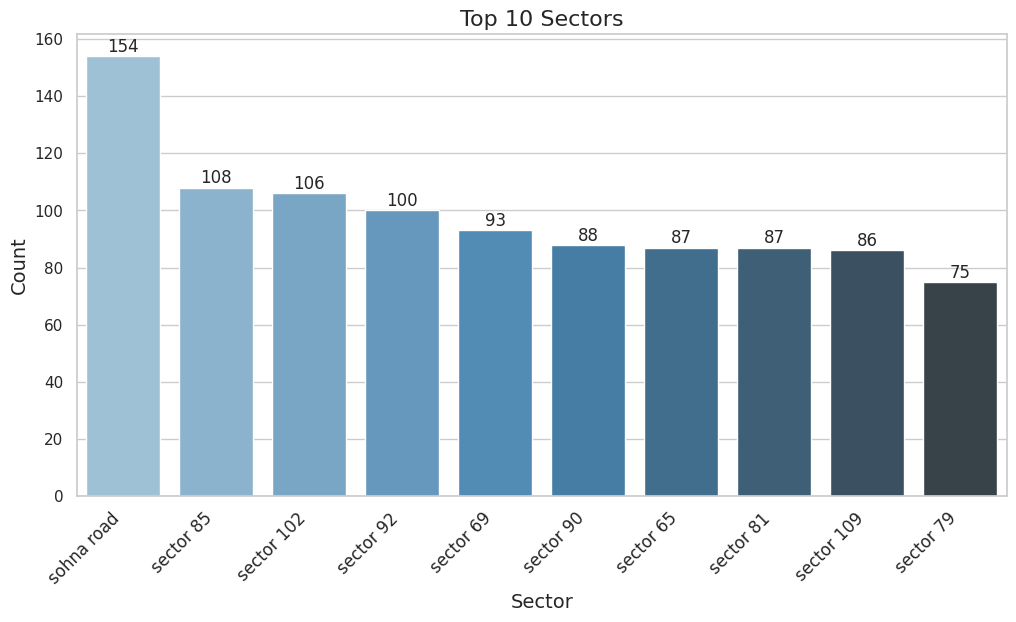

In [17]:
top_10_sectors = df['sector'].value_counts().head(10)

# Setting up the plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Creating the bar plot
sns.barplot(x=top_10_sectors.index, y=top_10_sectors.values, palette="Blues_d")

# Adding titles and labels
plt.title('Top 10 Sectors', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding count labels on top of the bars
for i, count in enumerate(top_10_sectors.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()

In [18]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 24,
 'Average (10-49)': 64,
 'Low (2-9)': 23,
 'Very Low (1)': 1}

## Price

In [19]:
df['price'].isnull().sum()

18

In [20]:
df['price'].describe()

count    3668.000000
mean        2.536386
std         2.984565
min         0.075000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

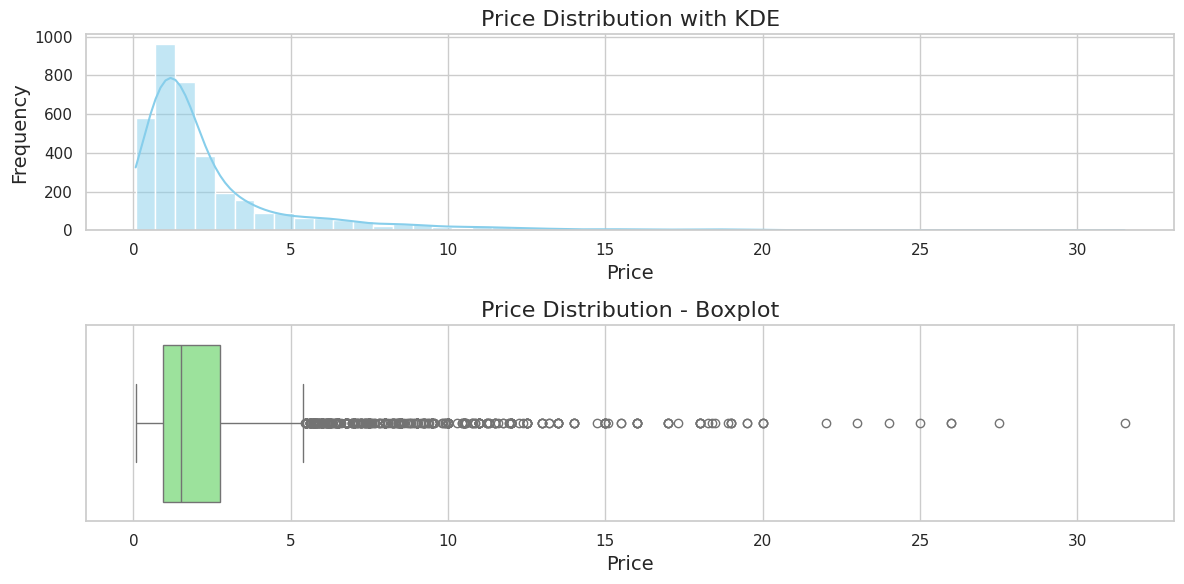

In [21]:
plt.figure(figsize=(12,6))

plt.subplot(2, 1, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Price Distribution with KDE', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Creating the boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=df['price'], color='lightgreen')
plt.title('Price Distribution - Boxplot', fontsize=16)
plt.xlabel('Price', fontsize=14)

# Adjusting layout for better readability
plt.tight_layout()

# Display the plots
plt.show()


**The above distribution is right skewed which means that most of the houses are in range of 1 to 5 cr but some houses are extremely costly**

### Descriptive Statistics

- **Count**: There are 3,660 non-missing price entries.
- **Mean Price**: The average price is approximately 2.53 crores.
- **Median Price**: The median (or 50th percentile) price is 1.52 crores.
- **Standard Deviation**: The prices have a standard deviation of 2.98, indicating variability in the prices.
- **Range**: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
- **IQR**: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.

### Visualizations

- **Distribution**: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
- **Box Plot**: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
- **Missing Values**: There are 17 missing values in the price column.


In [22]:
# Skewness and kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness, kurtosis)

3.271924613986893 14.847858369654881


**Skewness** : The price distribution has a skewness of approximately 3.27, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 14.85. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [23]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])
quantiles

0.01     0.25000
0.05     0.37035
0.95     8.50000
0.99    15.23200
Name: price, dtype: float64

## Quantile Analysis

- **1% Quantile**: Only 1% of properties are priced below 0.25 crores.
- **5% Quantile**: 5% of properties are priced below 0.37 crores.
- **95% Quantile**: 95% of properties are priced below 8.5 crores.
- **99% Quantile**: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.


In [24]:
# Outler identification using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [25]:
lower_bound = Q3 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

0.04999999999999982 5.45


In [26]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(427, 23)

In [27]:
outliers['price'].describe()

count    427.000000
mean       9.238267
std        4.066085
min        5.460000
25%        6.450000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

<Axes: xlabel='price'>

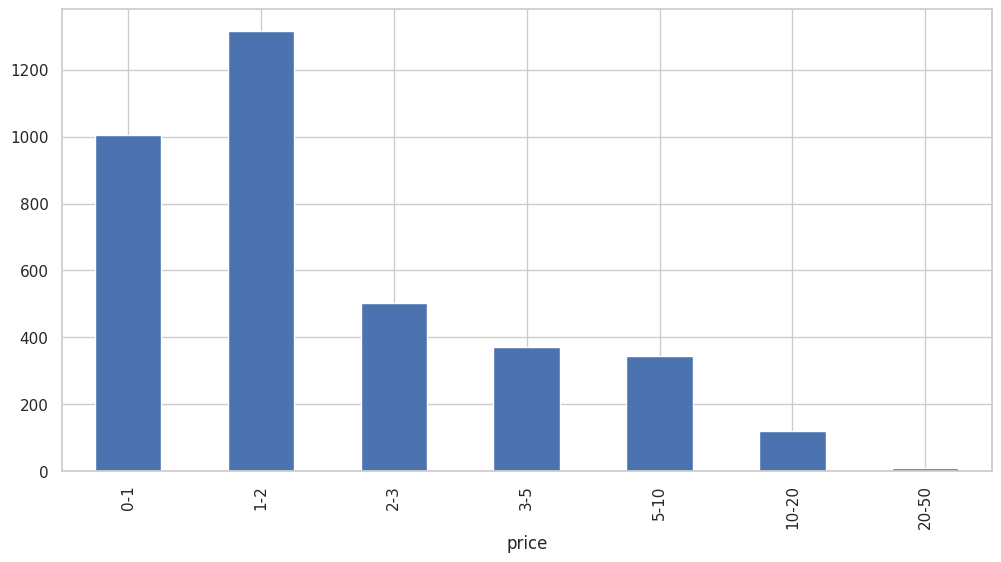

In [28]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
plt.figure(figsize=(12,6))
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

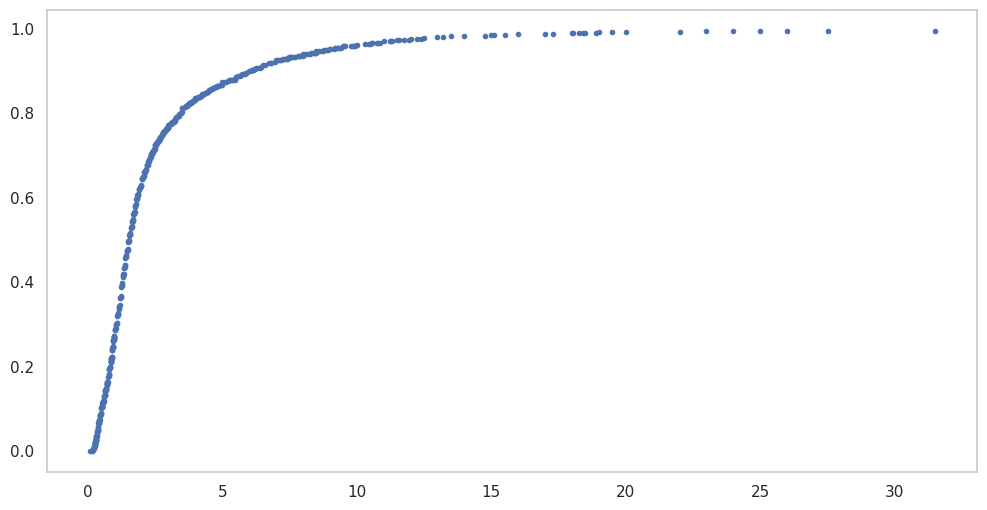

In [29]:
# ecdf plot
plt.figure(figsize=(12,6))
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

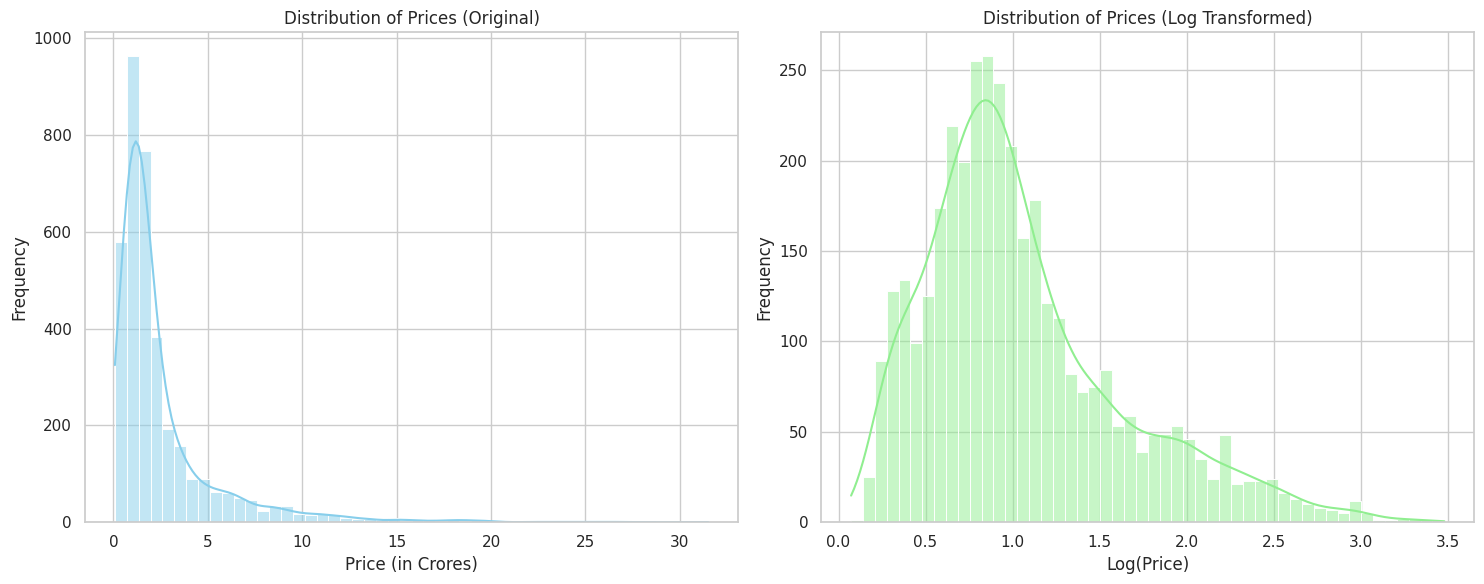

In [30]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

## Price per sqft

In [31]:
df['price_per_sqft'].isnull().sum()

18

In [32]:
df['price_per_sqft'].describe()

count      3668.000000
mean      13937.523446
std       23388.622938
min           4.000000
25%        6818.000000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

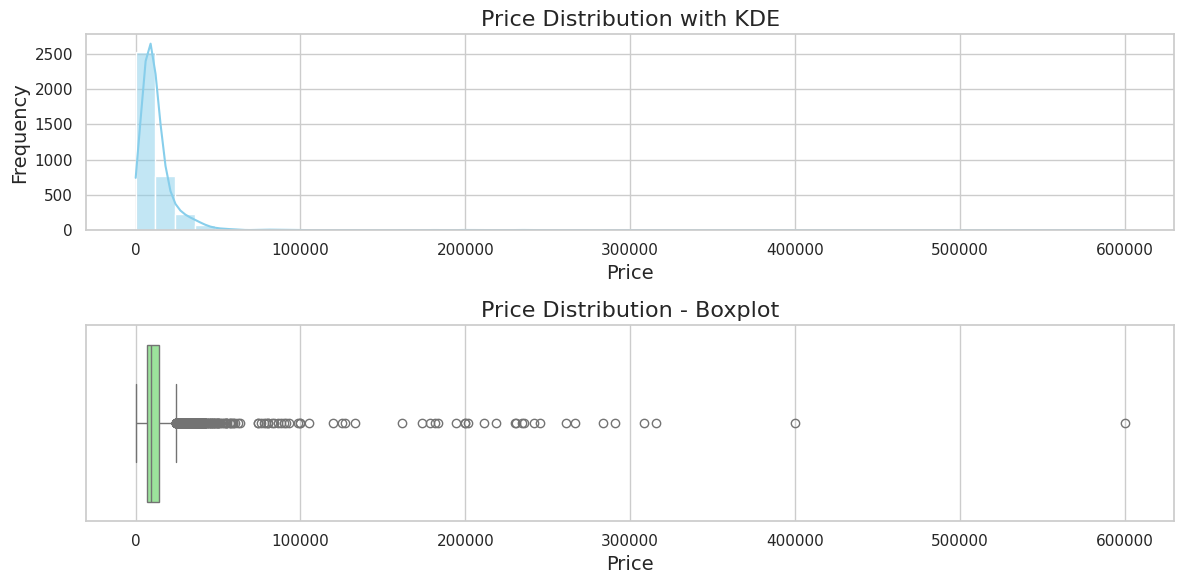

In [33]:
plt.figure(figsize=(12,6))

plt.subplot(2, 1, 1)
sns.histplot(df['price_per_sqft'], kde=True, bins=50, color='skyblue')
plt.title('Price Distribution with KDE', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Creating the boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=df['price_per_sqft'], color='lightgreen')
plt.title('Price Distribution - Boxplot', fontsize=16)
plt.xlabel('Price', fontsize=14)

# Adjusting layout for better readability
plt.tight_layout()

# Display the plots
plt.show()


**Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.**

**The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers**

## Bedroom

In [34]:
df['bedRoom'].isnull().sum()

0

In [35]:
df['bedRoom'].value_counts()

bedRoom
3     1498
2      945
4      662
5      212
1      124
6       74
9       41
8       30
7       28
12      28
10      20
16      12
13       4
18       2
19       2
14       1
20       1
11       1
21       1
Name: count, dtype: int64

<ipython-input-36-18720c150ea8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x=bedroom_counts.index, y=bedroom_counts.values, palette="Blues_d")


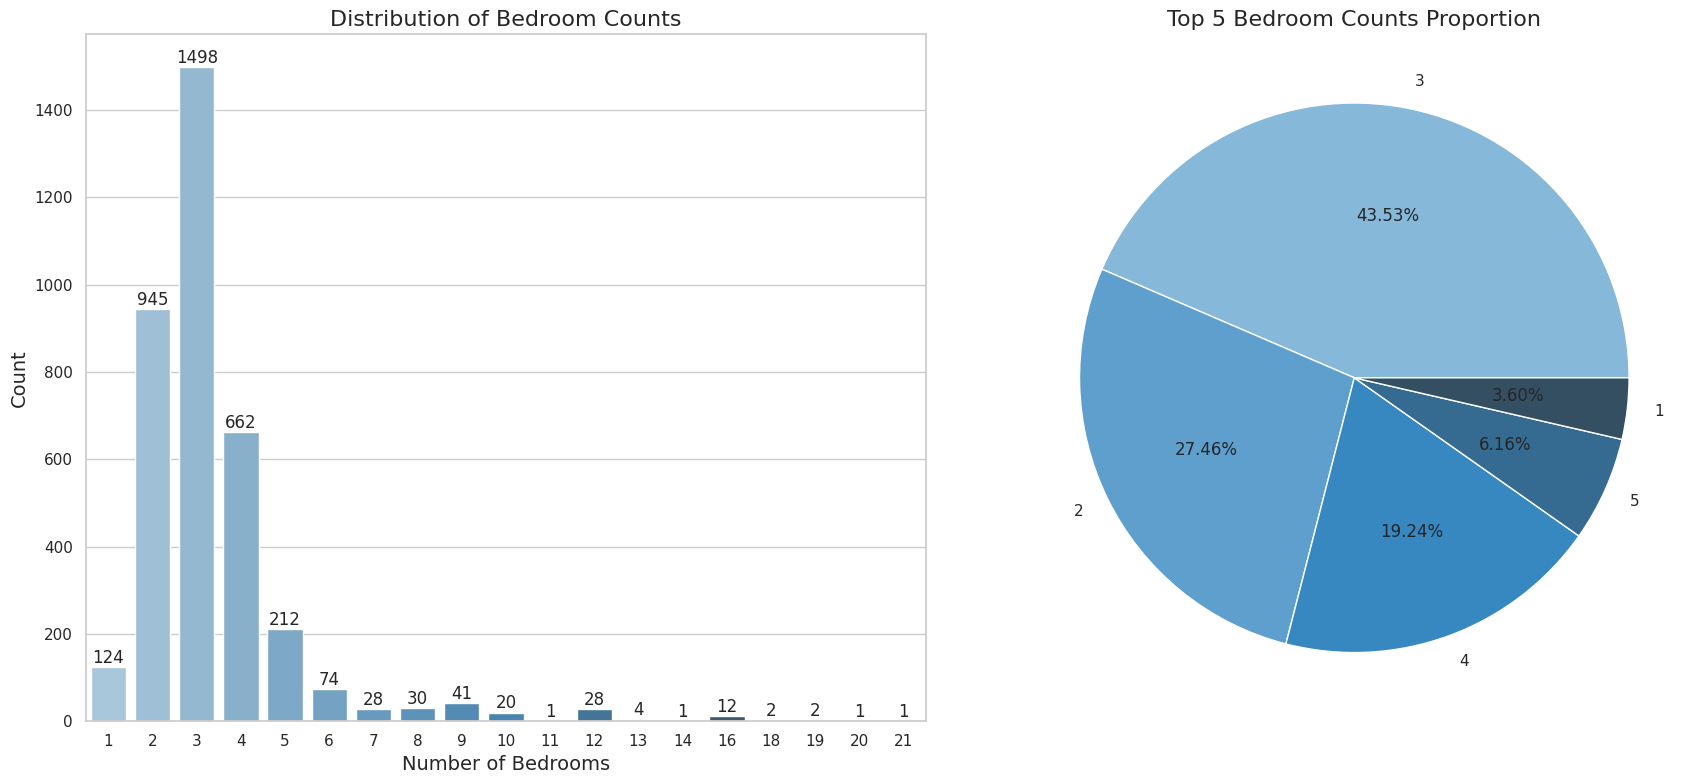

In [36]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
sns.set(style="whitegrid")

# Bar plot
bedroom_counts = df['bedRoom'].value_counts().sort_index()
sns.barplot(ax=axs[0], x=bedroom_counts.index, y=bedroom_counts.values, palette="Blues_d")

# Adding titles and labels for the bar plot
axs[0].set_title('Distribution of Bedroom Counts', fontsize=16)
axs[0].set_xlabel('Number of Bedrooms', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)

# Adding count labels on top of the bars
for i, count in enumerate(bedroom_counts.values):
    axs[0].text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)

# Pie chart
bedroom_counts_normalized = df['bedRoom'].value_counts(normalize=True).head()
colors = sns.color_palette("Blues_d", len(bedroom_counts_normalized))
bedroom_counts_normalized.plot(kind='pie', autopct='%0.2f%%', colors=colors, ax=axs[1])

# Adding title for the pie chart
axs[1].set_title('Top 5 Bedroom Counts Proportion', fontsize=16)
axs[1].set_ylabel('')  # Remove the y-label for the pie chart

# Ensure pie chart is a circle
axs[1].set_aspect('equal')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

## Bathroom

In [37]:
df['bathroom'].isnull().sum()

0

<ipython-input-38-c5efc094e66a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x=bathroom_counts.index, y=bathroom_counts.values, palette="Blues_d")


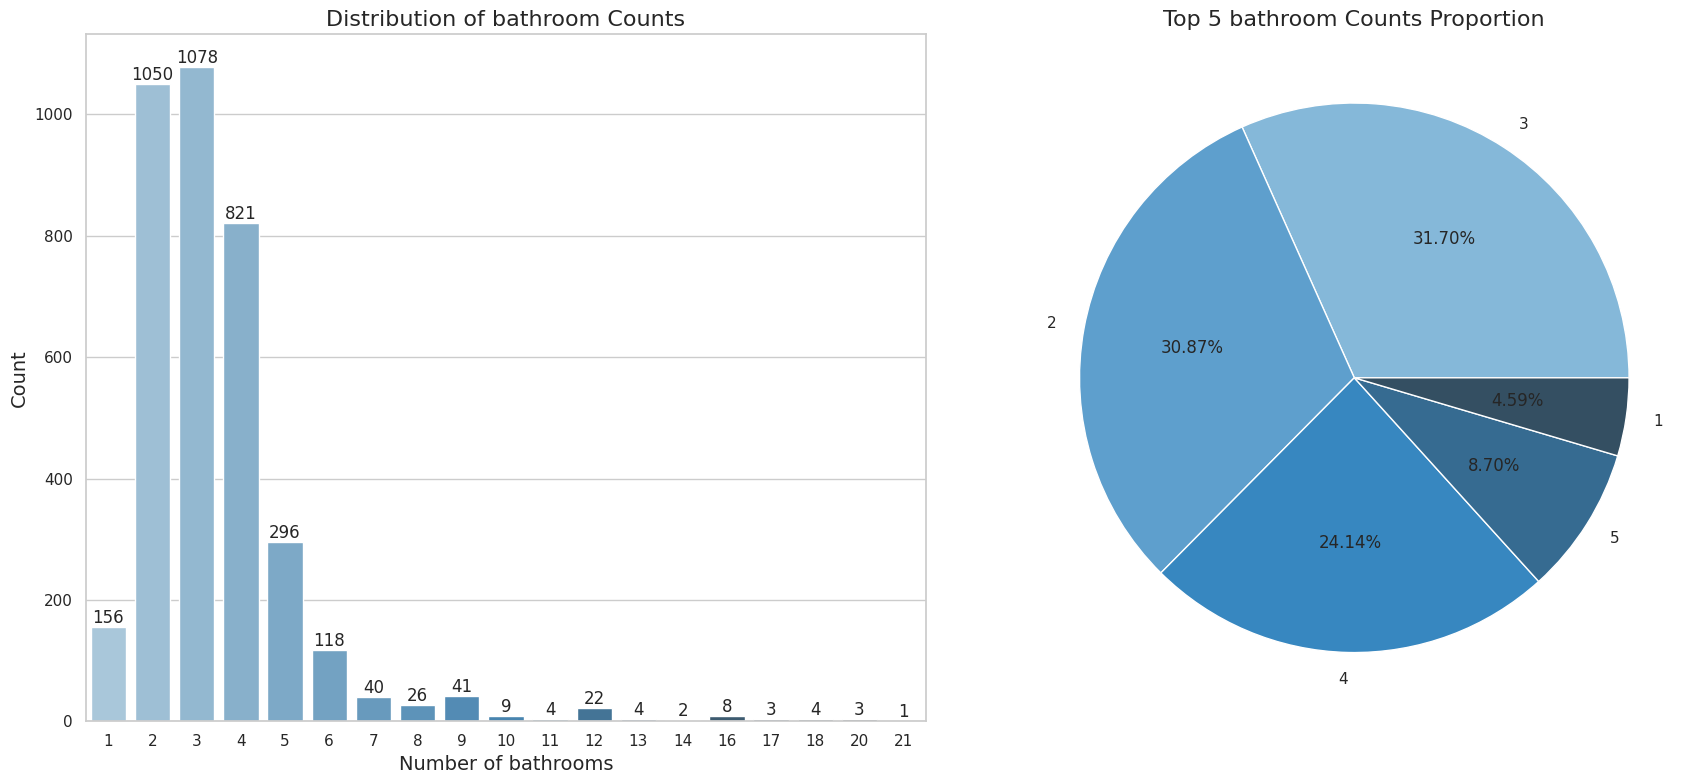

In [38]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
sns.set(style="whitegrid")

# Bar plot
bathroom_counts = df['bathroom'].value_counts().sort_index()
sns.barplot(ax=axs[0], x=bathroom_counts.index, y=bathroom_counts.values, palette="Blues_d")

# Adding titles and labels for the bar plot
axs[0].set_title('Distribution of bathroom Counts', fontsize=16)
axs[0].set_xlabel('Number of bathrooms', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)

# Adding count labels on top of the bars
for i, count in enumerate(bathroom_counts.values):
    axs[0].text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)

# Pie chart
bathroom_counts_normalized = df['bathroom'].value_counts(normalize=True).head()
colors = sns.color_palette("Blues_d", len(bathroom_counts_normalized))
bathroom_counts_normalized.plot(kind='pie', autopct='%0.2f%%', colors=colors, ax=axs[1])

# Adding title for the pie chart
axs[1].set_title('Top 5 bathroom Counts Proportion', fontsize=16)
axs[1].set_ylabel('')  # Remove the y-label for the pie chart

# Ensure pie chart is a circle
axs[1].set_aspect('equal')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

## Balcony

In [39]:
df['balcony'].isnull().sum()

0

<ipython-input-40-93be8dfc801e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x=balcony_counts.index, y=balcony_counts.values, palette="Blues_d")


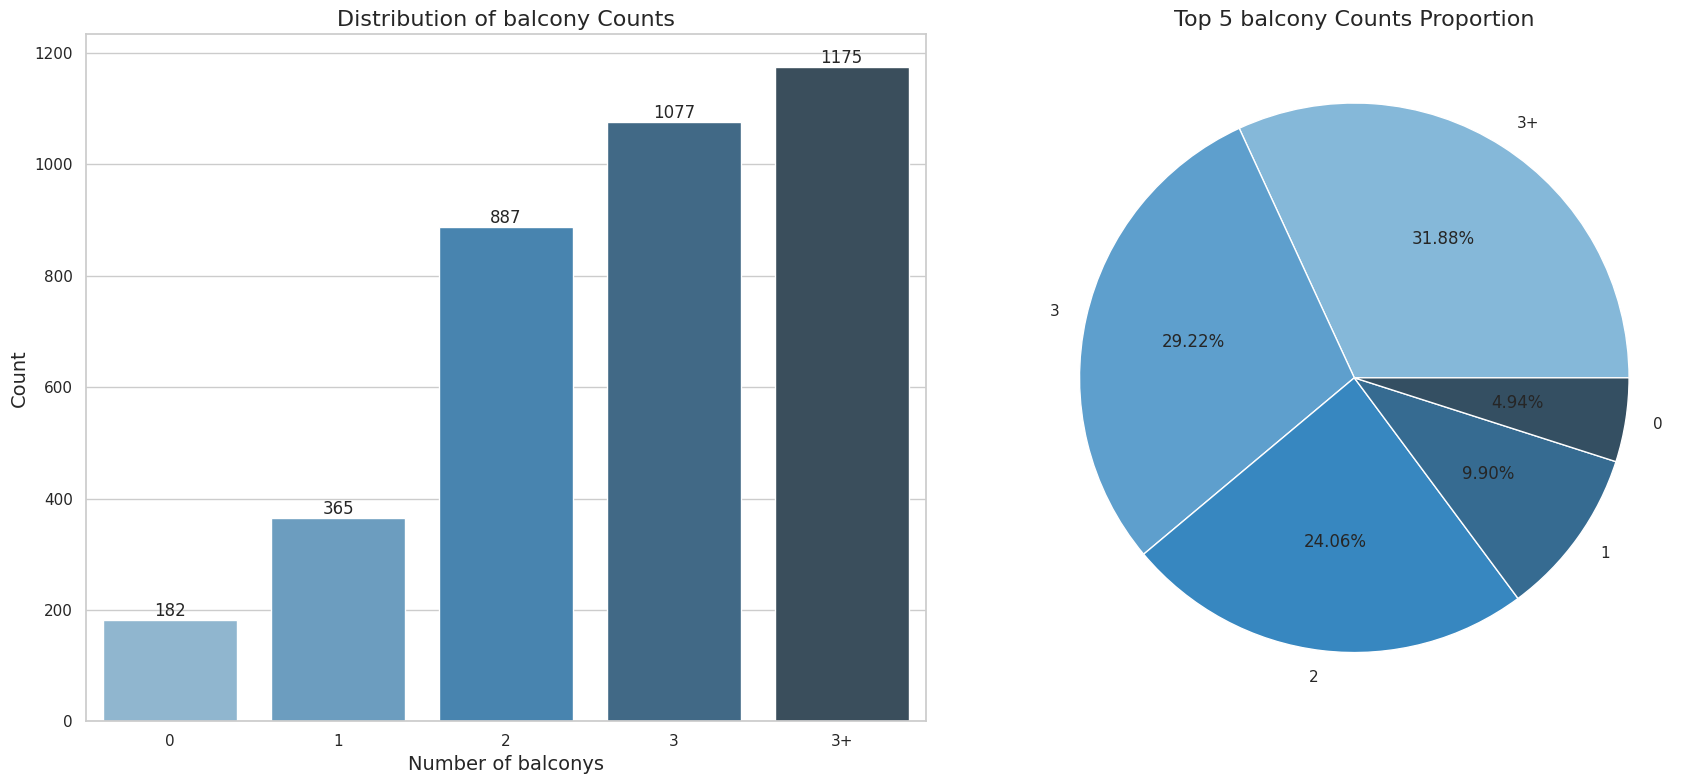

In [40]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
sns.set(style="whitegrid")

# Bar plot
balcony_counts = df['balcony'].value_counts().sort_index()
sns.barplot(ax=axs[0], x=balcony_counts.index, y=balcony_counts.values, palette="Blues_d")

# Adding titles and labels for the bar plot
axs[0].set_title('Distribution of balcony Counts', fontsize=16)
axs[0].set_xlabel('Number of balconys', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)

# Adding count labels on top of the bars
for i, count in enumerate(balcony_counts.values):
    axs[0].text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)

# Pie chart
balcony_counts_normalized = df['balcony'].value_counts(normalize=True).head()
colors = sns.color_palette("Blues_d", len(balcony_counts_normalized))
balcony_counts_normalized.plot(kind='pie', autopct='%0.2f%%', colors=colors, ax=axs[1])

# Adding title for the pie chart
axs[1].set_title('Top 5 balcony Counts Proportion', fontsize=16)
axs[1].set_ylabel('')  # Remove the y-label for the pie chart

# Ensure pie chart is a circle
axs[1].set_aspect('equal')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Floor number

In [41]:
df['floorNum'].isnull().sum()

19

In [42]:
df['floorNum'].value_counts()

floorNum
3.0     501
2.0     494
1.0     351
4.0     317
8.0     195
6.0     183
10.0    179
7.0     178
5.0     169
9.0     161
12.0    158
0.0     129
14.0    113
11.0    113
15.0     81
16.0     52
17.0     46
13.0     42
18.0     36
19.0     33
20.0     26
21.0     16
23.0     14
22.0     13
24.0     11
25.0      9
27.0      8
30.0      5
26.0      5
33.0      4
28.0      4
29.0      3
31.0      3
43.0      2
39.0      2
32.0      2
34.0      2
35.0      2
44.0      1
40.0      1
45.0      1
51.0      1
38.0      1
Name: count, dtype: int64

In [43]:
df['floorNum'].describe()

count    3667.000000
mean        6.797382
std         6.009459
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<ipython-input-44-1282148446a7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=floors.index, y=floors.values, palette="Blues_d")


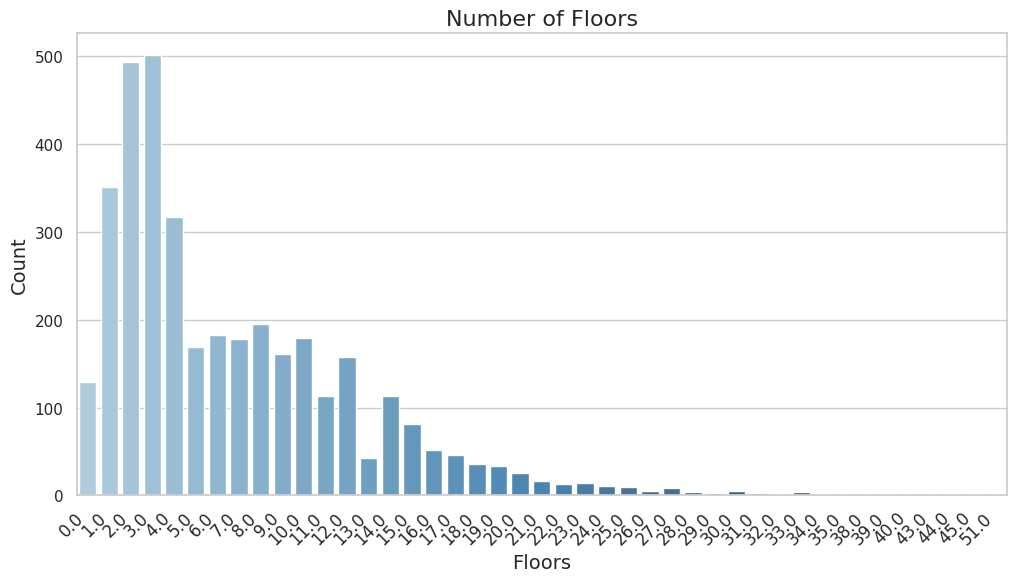

In [44]:
floors = df['floorNum'].value_counts()

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Creating the bar plot
sns.barplot(x=floors.index, y=floors.values, palette="Blues_d")

# Adding titles and labels
plt.title('Number of Floors', fontsize=16)
plt.xlabel('Floors', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Display the plot
plt.show()

Text(0.5, 0, 'Number of floors')

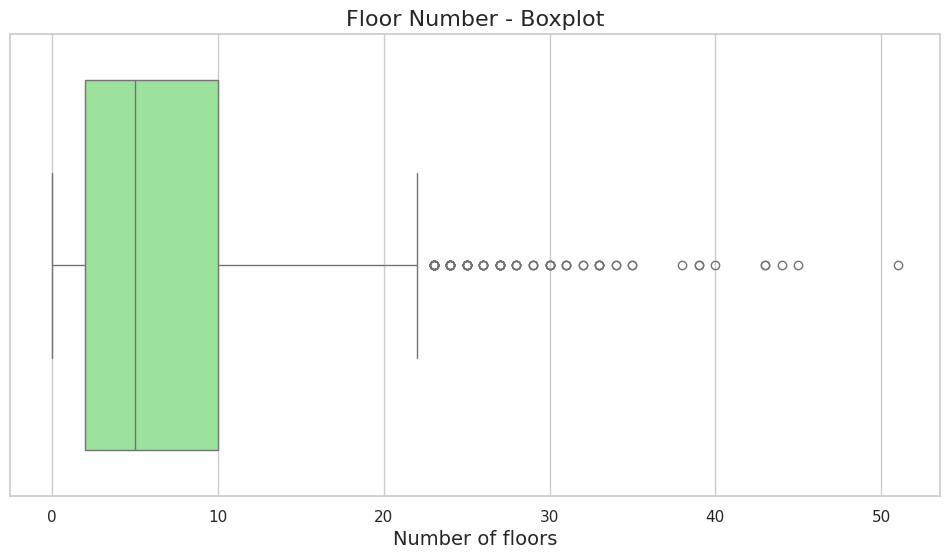

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['floorNum'], color='lightgreen')
plt.title('Floor Number - Boxplot', fontsize=16)
plt.xlabel('Number of floors', fontsize=14)

## Floor Distribution Analysis

- **Majority of Properties**: The majority of the properties lie between the ground floor (0) and the 25th floor.
- **Common Floors**: Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- **Higher Floors**: There are a few properties located at higher floors, but their frequency is much lower.
- **Box Plot Insights**:
  - The majority of the properties are concentrated around the lower floors.
  - The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
  - Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.


## Super built up area

In [46]:
df['super_built_up_area'].isnull().sum()

1807

In [47]:
df['super_built_up_area'].describe()

count     1879.000000
mean      1925.938558
std        767.042369
min         89.000000
25%       1478.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<ipython-input-48-c27038dc3336>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['super_built_up_area'], palette="Blues_d",kde=True)


<Axes: xlabel='super_built_up_area', ylabel='Count'>

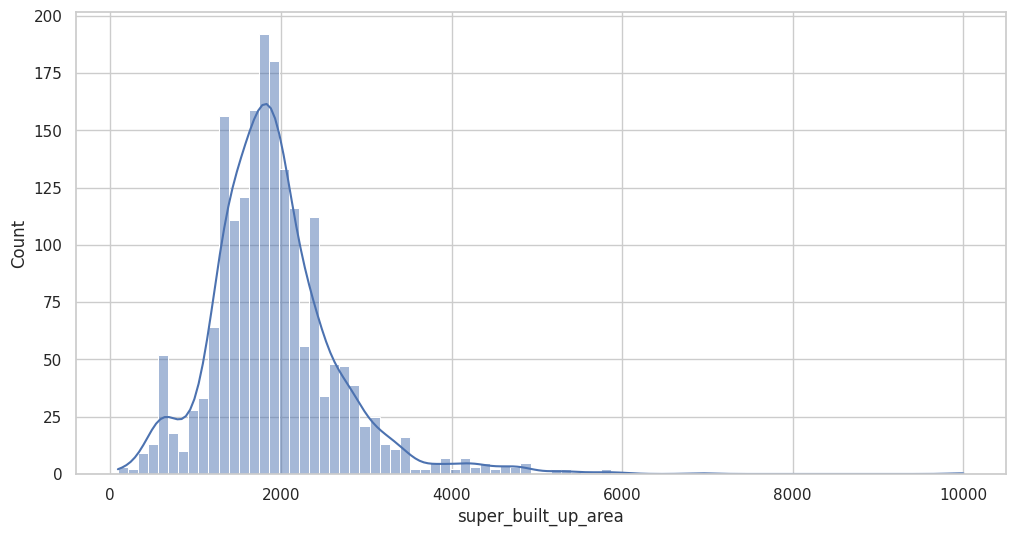

In [48]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.histplot(df['super_built_up_area'], palette="Blues_d",kde=True)

<Axes: xlabel='super_built_up_area'>

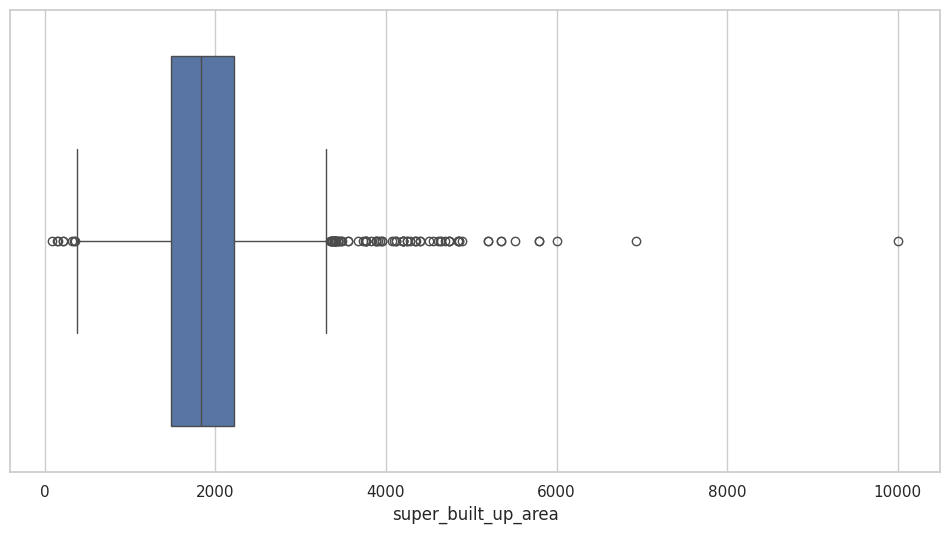

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['super_built_up_area'].dropna())

- **Common Range**: Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- **Right-Skewed Distribution**: There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- **Interquartile Range (IQR)**: The IQR lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- **Potential Outliers**: There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.


## Built Up Area

In [51]:
df['built_up_area'].describe()

count      1694.000000
mean       2395.766112
std       17920.751069
min           2.000000
25%        1121.250000
50%        1662.500000
75%        2400.026783
max      737146.316480
Name: built_up_area, dtype: float64

**Such high values indicates that there surely is some data error**

In [57]:
df_temp = df[df['built_up_area'] != df['built_up_area'].max()]

In [58]:
df_temp['built_up_area'].describe()

count     1693.000000
mean      1961.772875
std       1445.487151
min          2.000000
25%       1120.000000
50%       1660.000000
75%       2400.026783
max      13500.000000
Name: built_up_area, dtype: float64

<ipython-input-60-16edd55e1966>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_temp['built_up_area'], palette="Blues_d",kde=True)


<Axes: xlabel='built_up_area', ylabel='Count'>

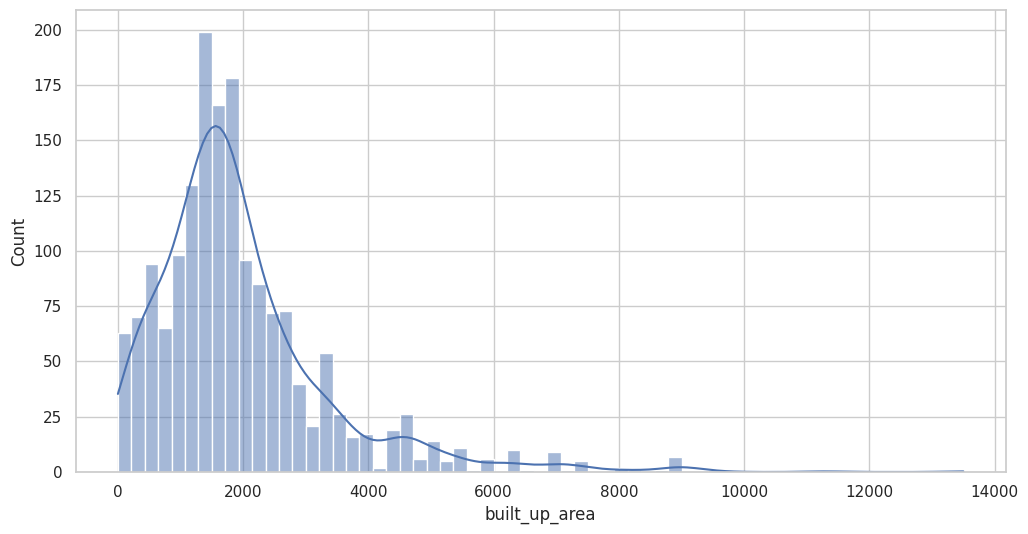

In [60]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.histplot(df_temp['built_up_area'], palette="Blues_d",kde=True)

<Axes: xlabel='built_up_area'>

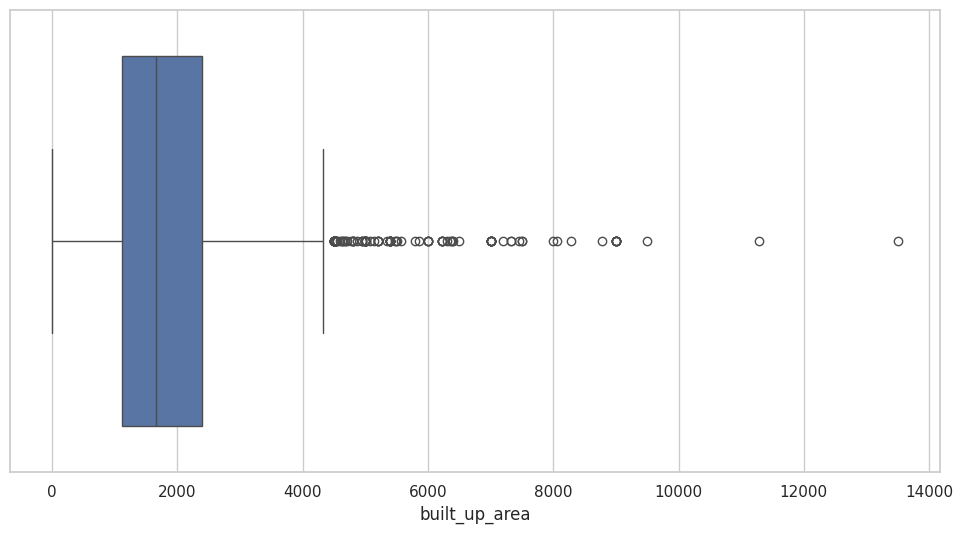

In [59]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_temp['built_up_area'].dropna())

## Carpet Area

In [62]:
df['carpet_area'].describe()

count      1876.000000
mean       2568.813473
std       22820.689859
min          15.000000
25%         849.000000
50%        1300.000000
75%        1800.000000
max      607935.384490
Name: carpet_area, dtype: float64

In [63]:
df_temp_carpet = df[df['carpet_area'] != df['carpet_area'].max()]

In [65]:
df_temp_carpet['carpet_area'].describe()

count      1875.000000
mean       2245.951302
std       18038.936459
min          15.000000
25%         849.000000
50%        1300.000000
75%        1800.000000
max      569242.500799
Name: carpet_area, dtype: float64

## Additional Rooms

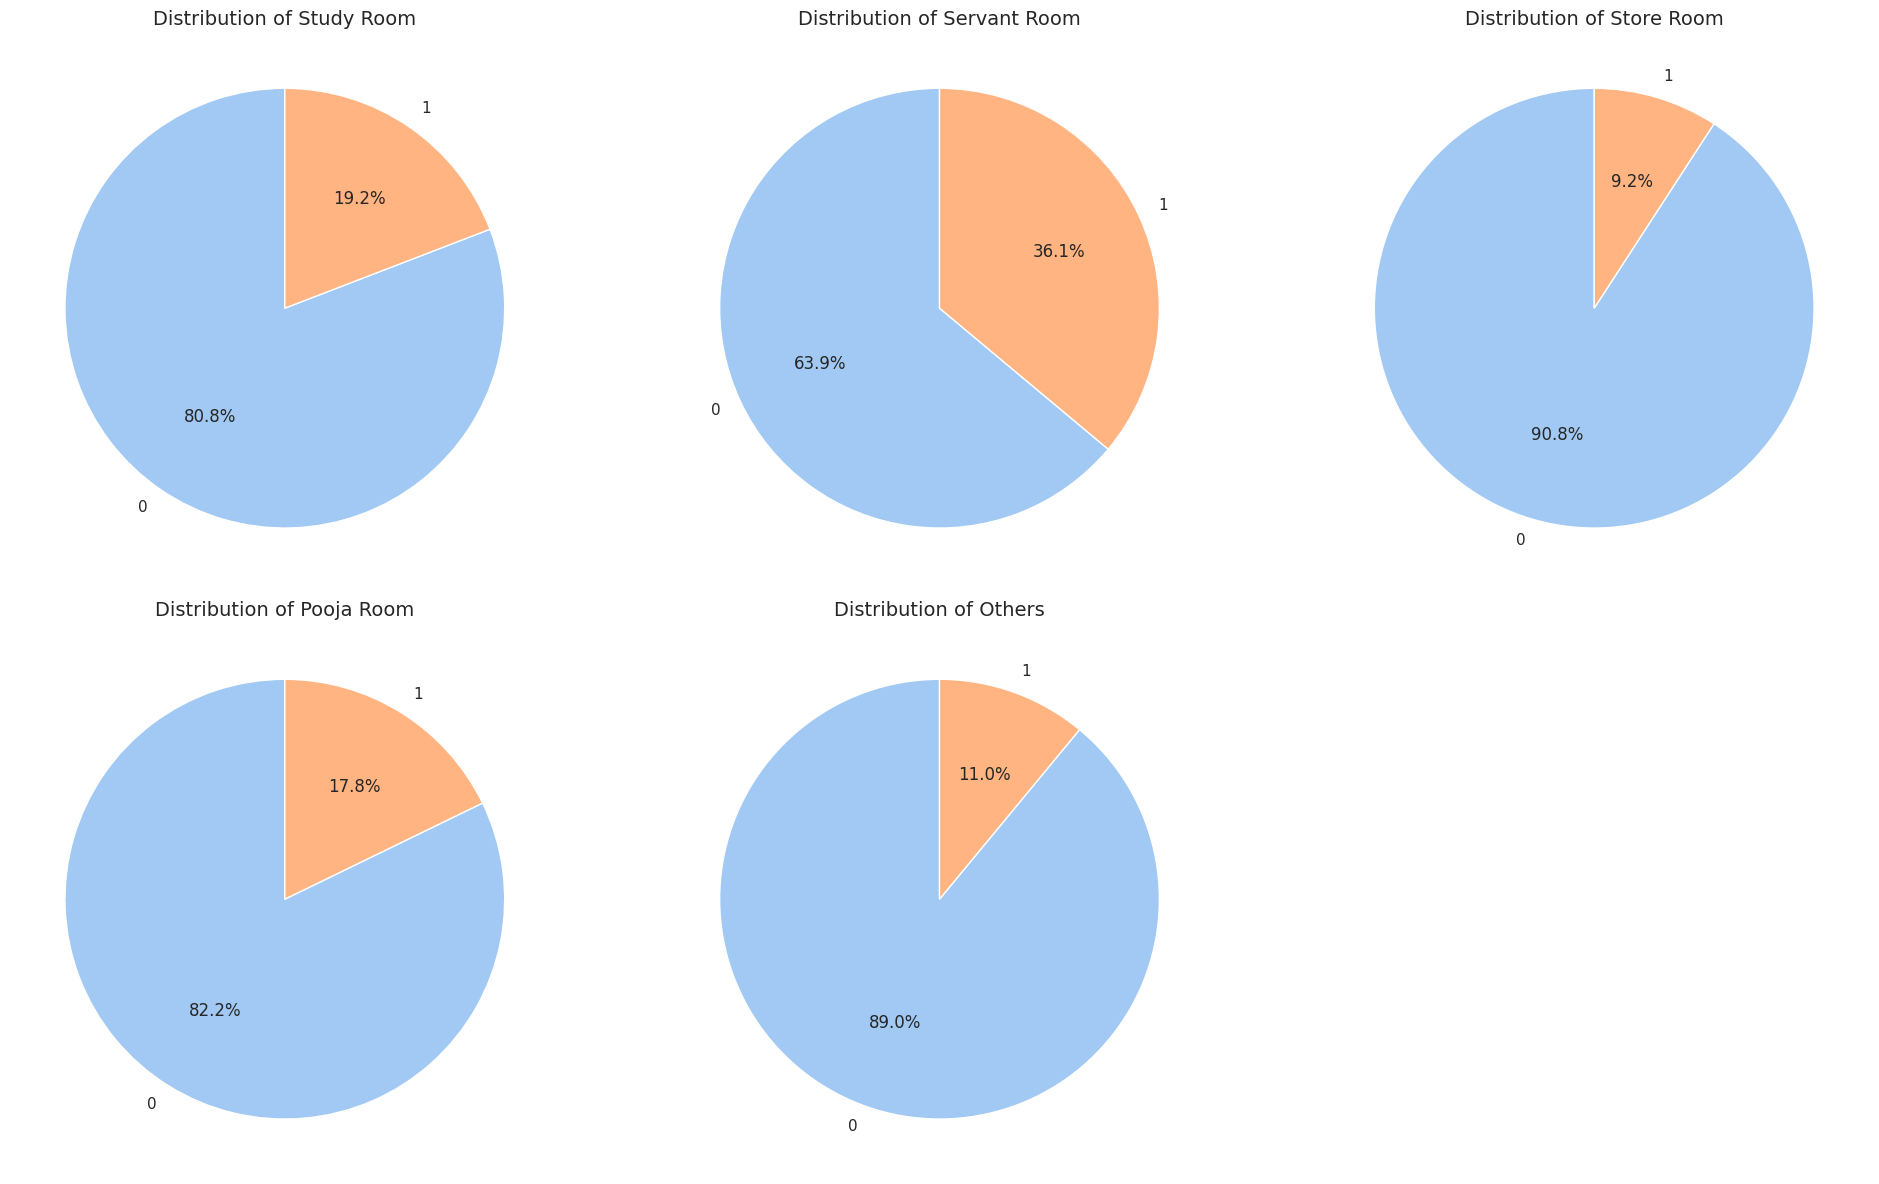

In [66]:
plt.figure(figsize=(20, 12))
sns.set(style="whitegrid")

colors = sns.color_palette("pastel")

for idx, room in enumerate(['study room', 'servant room', 'store room', 'pooja room', 'others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax, colors=colors)
    ax.set_title(f'Distribution of {room.title()}', fontsize=14)
    ax.set_ylabel('')


plt.tight_layout()

plt.show()

- **Study Room** - 81% of the houses don't have study room, only 19% of the houses have that facility.
- **Servant Room** - 64% of the houses don't have servant room, only 36% have it.
- **Store Room** - 91% of the houses don't have Store Room, only 9% have it.
- **Pooja Room** - 82% of the houses don't have Pooja Room, only 18% of the rooms have it.
- **Others** - 89% of the houses don't have others, only 11% have it.


## Furnishing Type

In [67]:
df['furnishing_type'].value_counts()

furnishing_type
1    2422
0    1058
2     206
Name: count, dtype: int64

Text(0, 0.5, 'Percentage')

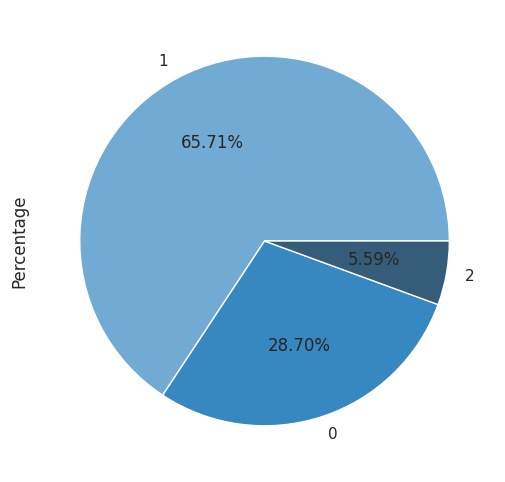

In [72]:
plt.figure(figsize=(12,6))
furnishing_normalized = df['furnishing_type'].value_counts(normalize=True).head()
colors = sns.color_palette("Blues_d", len(furnishing_normalized))
furnishing_normalized.plot(kind='pie', autopct='%0.2f%%', colors=colors)
plt.ylabel('Percentage')